<a href="https://colab.research.google.com/github/dajuanyoung/Project---Food-Desert/blob/main/Team_58_Impact_of_Food_Environment_on_Obesity_Rates_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install libspatialindex-dev
!pip3 install rtree pygeos
!pip install geopandas
!pip install --upgrade -q pygsheets
!pip install -q xlrd

import geopandas as gpd
import os
import json
import numpy as np
import io
import pandas as pd
from google.colab import files
import google.auth
from google.colab import auth
import pygsheets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
#documentation for pyghsheets
#https://www.pingshiuanchua.com/blog/post/intro-to-colaboratory-and-linking-it-to-google-sheets
auth.authenticate_user()
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
#documentation for pyghsheets
#https://www.pingshiuanchua.com/blog/post/overpower-your-google-sheets-with-python
sheet = gc.open_by_key('1i9S39tYb5f5FTxQw3OIasrB8nv4flruoO4JXMJmeRQA') #the key is the long string of letters and numbers in your spreadsheet's URL after "/d/"

In [ ]:
sheet12 = gc.open_by_key('1ZR087iCTz7FsNnWdc7EZ06jTgRE5FCdB7pH-WQx2Pec')
sheet20 = gc.open_by_key('14AK1FC6smT2ND_oLfn24X3JDuLOkrtT-FS22Ag4Yzgc')
grocery_mg = gc.open_by_key('1c1qAuiNlgKn_Gok_Zc5-HSiOShmenLBsNGNU62ACUSI')
fitness_tf = gc.open_by_key('1ntYljwb5HhjebnbvxMHrY1kIxRowyXCkYjKuycJP5rA')
farm_dy = gc.open_by_key('176bWTcCvYc0fyy4s2PfaqYLE0Qd0kv9SRH4soc9_4vw')

In [ ]:
vars2010atlas2012 = ['SNAPS10','SNAPSPTH10']

In [ ]:
vars2011atlas2020 = ['GROC11','GROCPTH11','SUPERC11','SUPERCPTH11','CONVS11','CONVSPTH11','SPECS11','SPECSPTH11','WICS11','WICSPTH11','FFR11',
                     'FFRPTH11','FSR11','FSRPTH11','SNAP_PART_RATE11','PC_WIC_REDEMP11','REDEMP_WICS11','RECFAC11','RECFACPTH11']

In [ ]:
cat_columns = ['FIPS','State','County','Region','Division']

In [ ]:
#function to import a df from our main 2017 xlsx file using tab name as the input
#documentation for pyghsheets
#https://www.pingshiuanchua.com/blog/post/overpower-your-google-sheets-with-python
def import_tab(tab_name,sheet):
  tab = sheet.worksheet_by_title(tab_name)
  df = tab.get_as_df()
  return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
vars15 = import_tab('Variable List',sheet)
vars12 = import_tab('Variable List',sheet12)
vars20 = import_tab('Variable List',sheet20)

In [ ]:
all_years = [vars15,vars12,vars20]
years = [2015,2012,2020]

In [ ]:
def clean_df(df, year):
  df = df[['Variable Code','Variable Name']].rename(columns={'Variable Code':'code','Variable Name':'description'})
  df['dataset_year'] = year
  return df

In [ ]:
full_vars = pd.DataFrame(columns = ['code','description','dataset_year'])

for i in range(0,len(years)):
  df = clean_df(all_years[i],years[i])
  full_vars = pd.concat([full_vars,df]).reset_index(drop=True)

In [ ]:
full_vars['description'] = full_vars['description'].str.replace('*','')
full_vars['var_year'] = full_vars['description'].str[-4:]
full_vars = full_vars[~full_vars['var_year'].str.contains("-")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


**Adding 2010 grocery and fitness data**

In [ ]:
#MG added grocery 2010 vars to full_vars

full_vars = full_vars.append([{'code':'GROC10',
                   'description': 'Grocery stores, 2010',
                   'dataset_year': '2010',
                   'var_year':'2010'}],
                 )
full_vars = full_vars.append([{'code':'GROCPTH10',
                   'description': 'Grocery stores/1,000 pop, 2011',
                   'dataset_year': '2010',
                   'var_year':'2010'}]
)
full_vars

#tamara added fitness 2010 vars to full_vars

full_vars = full_vars.append([{'code':'RECFAC10',
                   'description': 'Recreation and fitness facilities, 2010',
                   'dataset_year': '2010',
                   'var_year':'2010'}],
                 )
full_vars = full_vars.append([{'code':'RECFACPTH10',
                   'description': 'Recreation and fitness facilities/1,000 pop, 2010',
                   'dataset_year': '2010',
                   'var_year':'2010'}]
)
full_vars

#Dajuan added farm 2009 vars to full_vars

full_vars = full_vars.append([{'code':'DIRSALES_FARMS09',
                   'description': 'Farms, 2009',
                   'dataset_year': '2009',
                   'var_year':'2009'}],
                 )
full_vars = full_vars.append([{'code':'PCT_LOCLFARM09',
                   'description': 'Farms/1,000 pop, 2009',
                   'dataset_year': '2009',
                   'var_year':'2009'}]
)
full_vars


,code,description,dataset_year,var_year
0,LACCESS_POP10,"Population, low access to store, 2010",2015,2010
1,PCT_LACCESS_POP10,"Population, low access to store (%), 2010",2015,2010
2,LACCESS_LOWI10,"Low income & low access to store, 2010",2015,2010
3,PCT_LACCESS_LOWI10,"Low income & low access to store (%), 2010",2015,2010
4,LACCESS_CHILD10,"Children, low access to store, 2010",2015,2010
...,...,...,...,...
0,GROCPTH10,"Grocery stores/1,000 pop, 2011",2010,2010
0,RECFAC10,"Recreation and fitness facilities, 2010",2010,2010
0,RECFACPTH10,"Recreation and fitness facilities/1,000 pop, 2010",2010,2010
0,DIRSALES_FARMS09,"Farms, 2009",2009,2009


In [ ]:
#converts every numerical variable in a df to float and the identifier, categorical variables to object type
def correct_var_type(df):
  df = df.replace(r'^\s+$', np.nan, regex=True).replace('',np.nan)
  for var in df.columns:
    if var in cat_columns:
      df[var] = df[var].astype('object')
    else:
      df[var] = df[var].astype('float')
  return df

In [ ]:
#imports and cleans each table from our file
access = correct_var_type(import_tab('ACCESS',sheet))
stores = correct_var_type(import_tab('STORES',sheet))
restaurants = correct_var_type(import_tab('RESTAURANTS',sheet))
assistance = correct_var_type(import_tab('ASSISTANCE',sheet))
insecurity = correct_var_type(import_tab('INSECURITY',sheet))
prices_taxes = correct_var_type(import_tab('PRICES_TAXES',sheet))
local = correct_var_type(import_tab('LOCAL',sheet))
health = correct_var_type(import_tab('HEALTH',sheet))
socioeconomic = correct_var_type(import_tab('SOCIOECONOMIC',sheet))

#extra 3 vars from 2012 atlas
stores12 = correct_var_type(import_tab('STORES',sheet12))

stores20 = correct_var_type(import_tab('STORES',sheet20))
restaurants20 = correct_var_type(import_tab('RESTAURANTS',sheet20))
assistance20 = correct_var_type(import_tab('ASSISTANCE',sheet20))
health20 = correct_var_type(import_tab('HEALTH',sheet20))

#MG added this ----------
grocery_mg_10 = correct_var_type(import_tab('grocery_data_pull',grocery_mg))
grocery_mg_10 = grocery_mg_10.drop(columns=['2010 Census population'])
grocery_vars = ['GROC10', 'GROCPTH10']

#merging fitness 2010 data
fitness_tf_10 = correct_var_type(import_tab('fitness_data_pull',fitness_tf))
fitness_tf_10 = fitness_tf_10.drop(columns=['2010 Census population'])
fitness_vars = ['RECFAC10', 'RECFACPTH10']

#Added by Dajuan

farm_dy_09 =  correct_var_type(import_tab('farm_pull',farm_dy))
farm_dy_09 = farm_dy_09.drop(columns=['County', 'State', 'POP-2009'])
farm_vars = ['DIRSALES_FARMS09','PCT_LOCLFARM09']


In [ ]:
#list of dfs
dfs = [access,stores,restaurants,assistance,insecurity,prices_taxes,local,health,socioeconomic,stores12,stores20,restaurants20,assistance20,health20, grocery_mg_10, fitness_tf_10, farm_dy_09]

In [ ]:
var_list_2010 = ['PCT_NHNA10','PCT_NHASIAN10','PCT_NHBLACK10','PCT_NHPI10','PCT_HISP10','PCT_65OLDER10','PCT_18YOUNGER10',
                 'PCT_NHWHITE10','PCT_LACCESS_CHILD10','LACCESS_CHILD10','PCT_LACCESS_HHNV10','LACCESS_HHNV10','PCT_LACCESS_LOWI10',
                 'LACCESS_LOWI10','METRO13','PERPOV10','PCT_LACCESS_POP10','LACCESS_POP10','PCT_LACCESS_SENIORS10','LACCESS_SENIORS10',
                 'PERCHLDPOV10','MILK_PRICE10','MILK_SODA_PRICE10','SODA_PRICE10','PC_SNAPBEN10','PCT_FREE_LUNCH10','PCT_REDUCED_LUNCH10',
                 'PCT_DIABETES_ADULTS10','PCT_OBESE_ADULTS10','CHILDPOVRATE10','MEDHHINC10','POVRATE10','SNAP_BBCE10','SNAP_FACEWAIVER10',
                 'SNAP_OAPP10','SNAP_PART_RATE10','SNAP_REPORTSIMPLE10','SNAP_VEHEXCL10'] + vars2010atlas2012 + vars2011atlas2020 + grocery_vars + fitness_vars + farm_vars

In [ ]:
#2015 atlas, 2010 vars
full = pd.merge(access,stores, how = 'left', on = cat_columns)
full = pd.merge(full,restaurants, how = 'left', on = cat_columns)
full = pd.merge(full,assistance, how = 'left', on = cat_columns)
full = pd.merge(full,insecurity, how = 'left', on = cat_columns)
full = pd.merge(full,prices_taxes, how = 'left', on = cat_columns)
full = pd.merge(full,local, how = 'left', on = cat_columns)
full = pd.merge(full,health, how = 'left', on = cat_columns)
full = pd.merge(full,socioeconomic, how = 'left', on = cat_columns)

#2012 atlas, 2010 vars
full = pd.merge(full,stores12, how = 'left', on = 'FIPS', suffixes=('', '_y'))

#2020 atlas, 2011 vars
full = pd.merge(full,stores20, how = 'left', on = 'FIPS',suffixes=('', '_y'))
full = pd.merge(full,restaurants20, how = 'left', on = 'FIPS',suffixes=('', '_y'))
full = pd.merge(full,assistance20, how = 'left', on = 'FIPS',suffixes=('', '_y'))
full = pd.merge(full,health20, how = 'left', on = 'FIPS',suffixes=('', '_y'))

full.drop(full.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [ ]:
full.head()

,FIPS,State,County,Region,Division,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS12,PCT_OBESE_ADULTS17,PCT_HSPA17,RECFAC11,RECFAC16,PCH_RECFAC_11_16,RECFACPTH11,RECFACPTH16,PCH_RECFACPTH_11_16
0,1001,AL,Autauga,South,East South Central,18428.439690,33.769657,5344.427472,9.793530,4822.500269,...,13.0,33.0,36.3,NaN,4.0,6.0,50.000000,0.072465,0.108542,49.785629
1,1003,AL,Baldwin,South,East South Central,35210.814080,19.318473,9952.144027,5.460261,7916.131932,...,10.4,33.0,36.3,NaN,16.0,21.0,31.250000,0.085775,0.101200,17.983256
2,1005,AL,Barbour,South,East South Central,5722.305602,20.840972,3135.676086,11.420316,940.419327,...,18.4,33.0,36.3,NaN,2.0,0.0,-100.000000,0.073123,0.000000,-100.000000
3,1007,AL,Bibb,South,East South Central,1044.867327,4.559753,491.449066,2.144661,249.204753,...,14.8,33.0,36.3,NaN,0.0,1.0,NaN,0.000000,0.044183,NaN
4,1009,AL,Blount,South,East South Central,1548.175559,2.700840,609.027708,1.062468,384.911607,...,14.1,33.0,36.3,NaN,3.0,4.0,33.333333,0.052118,0.069490,33.333333


In [ ]:
#Add any additional data here (replace the placeholder "INSERT_DF_NAME_HERE") and uncomment the next line
#full = pd.merge(full, INSERT_DF_NAME_HERE  , how = 'left')

full = pd.merge(full, grocery_mg_10, on = 'FIPS', how='left',suffixes=('', '_y')) #MG added this
full = pd.merge(full, fitness_tf_10, on = 'FIPS', how='left',suffixes=('', '_y'))
full = pd.merge(full, farm_dy_09, on = 'FIPS', how='left',suffixes=('', '_y')) #Dajuan

full.drop(full.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [ ]:
df_2010 = full[cat_columns + var_list_2010]

In [ ]:
filename = 'full data.csv'
df_2010.to_csv(filename)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,code,description,dataset_year
0,LACCESS_POP10,"Population, low access to store, 2010",2020
1,LACCESS_POP15,"Population, low access to store, 2015",2020
2,PCH_LACCESS_POP_10_15,"Population, low access to store (% change), 20...",2020
3,PCT_LACCESS_POP10,"Population, low access to store (%), 2010",2020
4,PCT_LACCESS_POP15,"Population, low access to store (%), 2015",2020
...,...,...,...
276,PERPOV10,"Persistent-poverty counties, 2010",2020
277,CHILDPOVRATE15,"Child poverty rate, 2015",2020
278,PERCHLDPOV10,"Persistent-child-poverty counties, 2010",2020
279,METRO13,"Metro/nonmetro counties, 2010",2020


In [ ]:
independent_vars = ['PCT_NHNA10','PCT_NHASIAN10','PCT_NHBLACK10','PCT_NHPI10','PCT_HISP10','PCT_65OLDER10','PCT_18YOUNGER10',
                 'PCT_NHWHITE10','PCT_LACCESS_CHILD10','LACCESS_CHILD10','PCT_LACCESS_HHNV10','LACCESS_HHNV10','PCT_LACCESS_LOWI10',
                 'LACCESS_LOWI10','METRO13','PERPOV10','PCT_LACCESS_POP10','LACCESS_POP10','PCT_LACCESS_SENIORS10','LACCESS_SENIORS10',
                 'PERCHLDPOV10','MILK_PRICE10','MILK_SODA_PRICE10','SODA_PRICE10','PC_SNAPBEN10','PCT_FREE_LUNCH10','PCT_REDUCED_LUNCH10',
                 'PCT_DIABETES_ADULTS10','CHILDPOVRATE10','MEDHHINC10','POVRATE10','SNAP_BBCE10','SNAP_FACEWAIVER10',
                 'SNAP_OAPP10','SNAP_PART_RATE10','SNAP_REPORTSIMPLE10','SNAP_VEHEXCL10'] + vars2010atlas2012 + vars2011atlas2020 + grocery_vars + fitness_vars + farm_vars

In [ ]:
var_definition_dict = pd.Series(full_vars['description'].values,index=full_vars['code']).to_dict()

% American Indian or Alaska Native, 2010 vs. Adult obesity rate (county), 2010


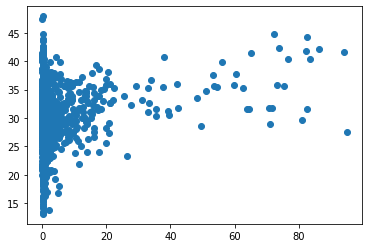

% Asian, 2010 vs. Adult obesity rate (county), 2010


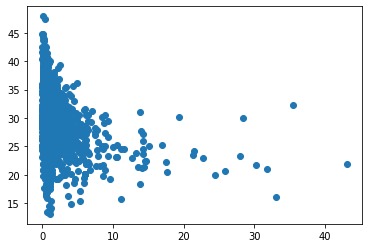

% Black, 2010 vs. Adult obesity rate (county), 2010


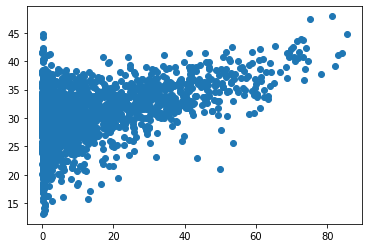

% Hawaiian or Pacific Islander, 2010 vs. Adult obesity rate (county), 2010


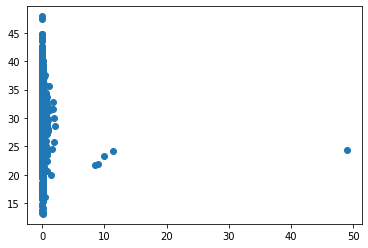

% Hispanic, 2010 vs. Adult obesity rate (county), 2010


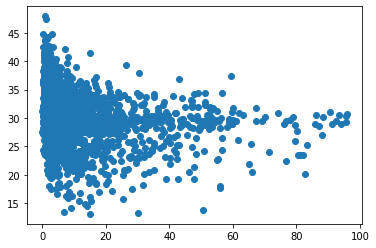

% Population 65 years or older, 2010 vs. Adult obesity rate (county), 2010


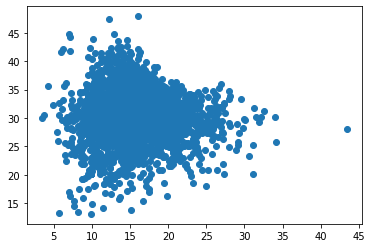

% Population under age 18, 2010 vs. Adult obesity rate (county), 2010


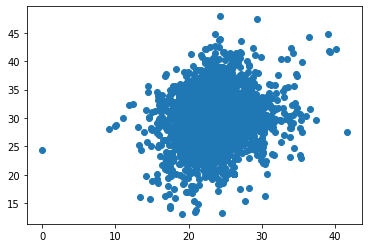

% White, 2010 vs. Adult obesity rate (county), 2010


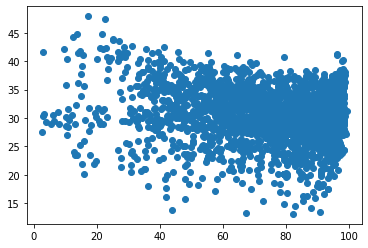

Children, low access to store (%), 2010 vs. Adult obesity rate (county), 2010


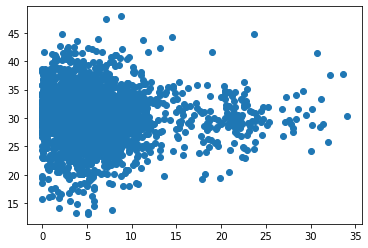

Children, low access to store, 2010 vs. Adult obesity rate (county), 2010


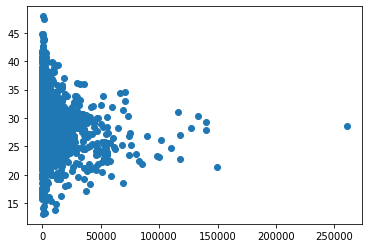

Households, no car & low access to store (%), 2010 vs. Adult obesity rate (county), 2010


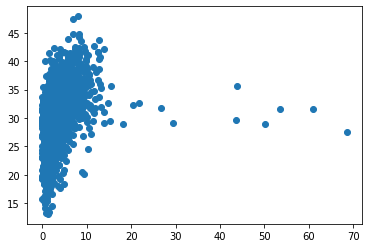

Households, no car & low access to store, 2010 vs. Adult obesity rate (county), 2010


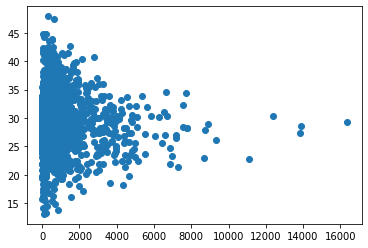

Low income & low access to store (%), 2010 vs. Adult obesity rate (county), 2010


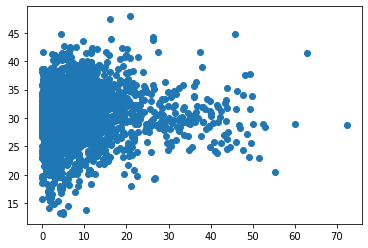

Low income & low access to store, 2010 vs. Adult obesity rate (county), 2010


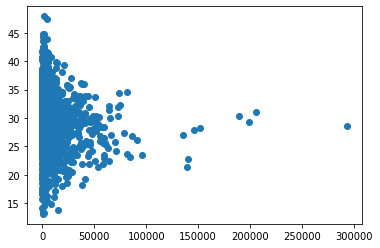

Metro/nonmetro counties, 2010 vs. Adult obesity rate (county), 2010


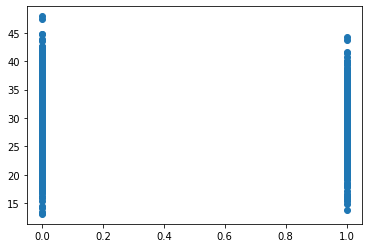

Persistent-poverty counties, 2010 vs. Adult obesity rate (county), 2010


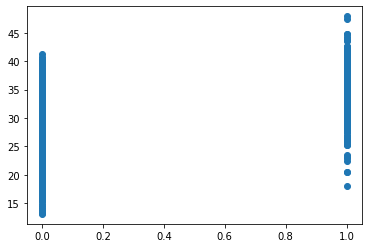

Population, low access to store (%), 2010 vs. Adult obesity rate (county), 2010


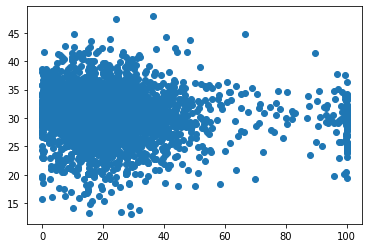

Population, low access to store, 2010 vs. Adult obesity rate (county), 2010


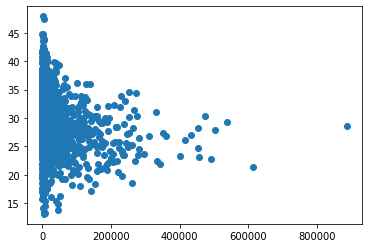

Seniors, low access to store (%), 2010 vs. Adult obesity rate (county), 2010


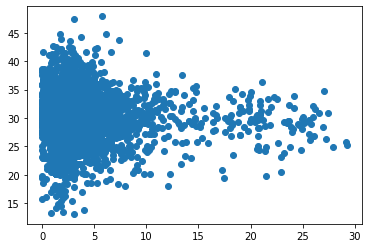

Seniors, low access to store, 2010 vs. Adult obesity rate (county), 2010


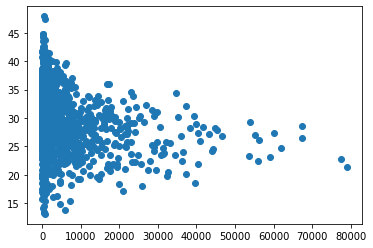

Persistent-child-poverty counties, 2010 vs. Adult obesity rate (county), 2010


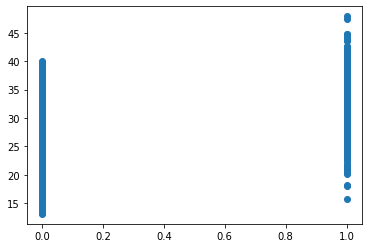

Price of low-fat milk/national average, 2010 vs. Adult obesity rate (county), 2010


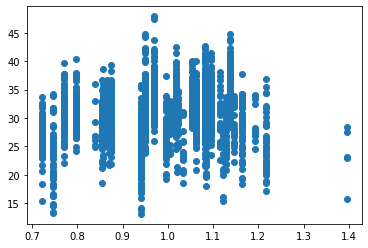

Price of low-fat milk/price of sodas, 2010 vs. Adult obesity rate (county), 2010


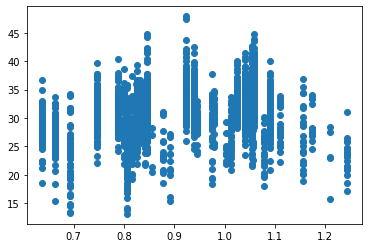

Price of sodas/national average, 2010 vs. Adult obesity rate (county), 2010


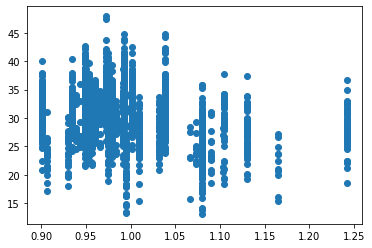

SNAP benefits per capita, 2010 vs. Adult obesity rate (county), 2010


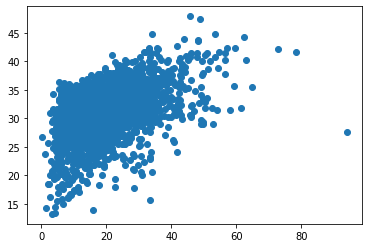

Students eligible for free lunch (%), 2010 vs. Adult obesity rate (county), 2010


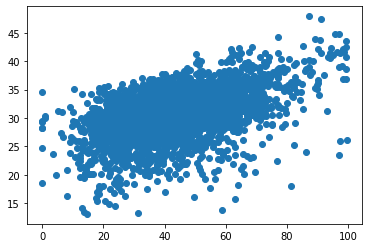

Students eligible for reduced-price lunch (%), 2010 vs. Adult obesity rate (county), 2010


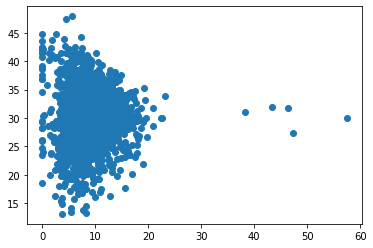

Adult diabetes rate, 2010 vs. Adult obesity rate (county), 2010


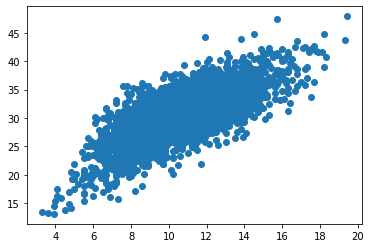

Child poverty rate, 2010 vs. Adult obesity rate (county), 2010


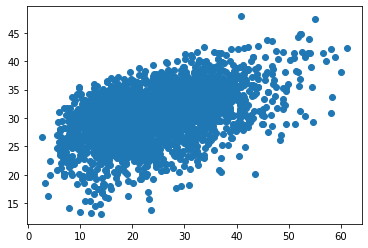

Median household income, 2010 vs. Adult obesity rate (county), 2010


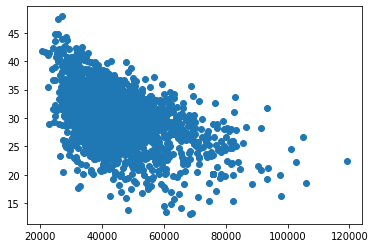

Poverty rate, 2010 vs. Adult obesity rate (county), 2010


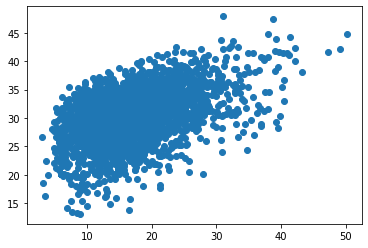

SNAP Broad-based Categorical Eligibility, 2010 vs. Adult obesity rate (county), 2010


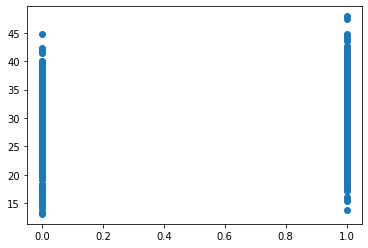

SNAP face interview waiver, 2010 vs. Adult obesity rate (county), 2010


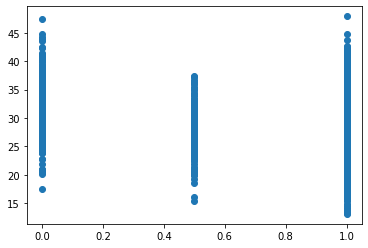

SNAP online application, 2010 vs. Adult obesity rate (county), 2010


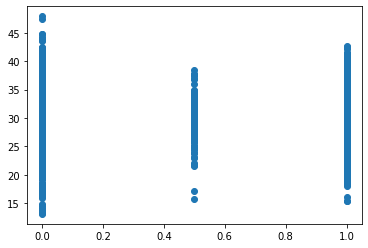

SNAP participants (% eligible pop), 2010 vs. Adult obesity rate (county), 2010


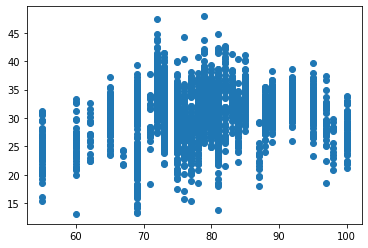

SNAP simplified reporting, 2010 vs. Adult obesity rate (county), 2010


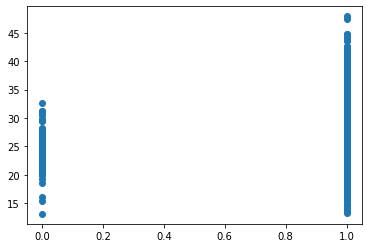

SNAP vehicle exclusion, 2010 vs. Adult obesity rate (county), 2010


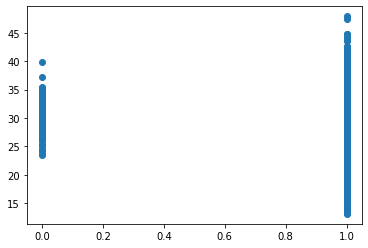

SNAP-authorized stores, 2010 vs. Adult obesity rate (county), 2010


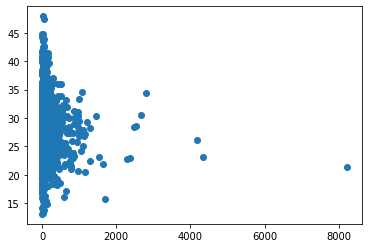

SNAP-authorized stores/1,000 pop, 2010 vs. Adult obesity rate (county), 2010


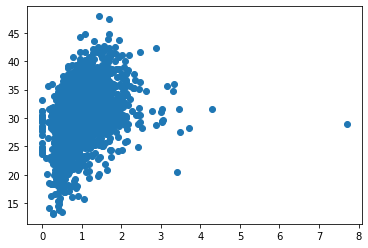

Grocery stores, 2011 vs. Adult obesity rate (county), 2010


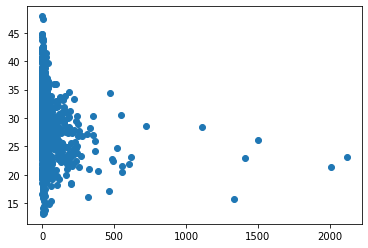

Grocery stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


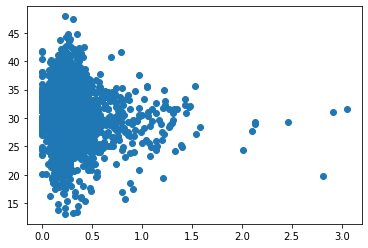

Supercenters & club stores, 2011 vs. Adult obesity rate (county), 2010


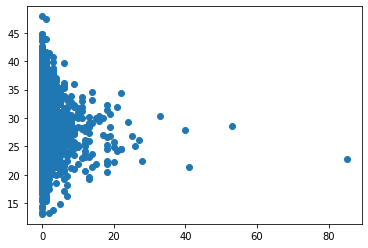

Supercenters & club stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


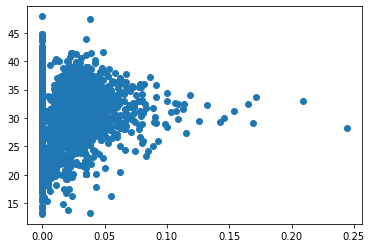

Convenience stores, 2011 vs. Adult obesity rate (county), 2010


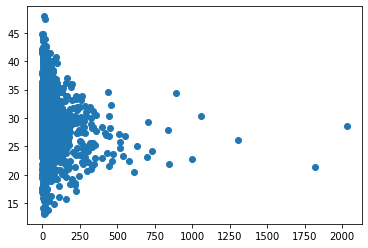

Convenience stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


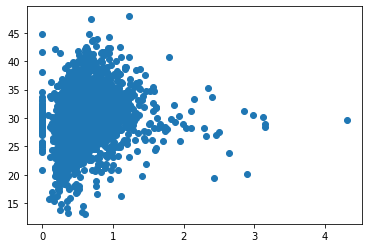

Specialized food stores, 2011 vs. Adult obesity rate (county), 2010


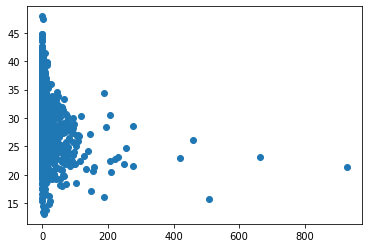

Specialized food stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


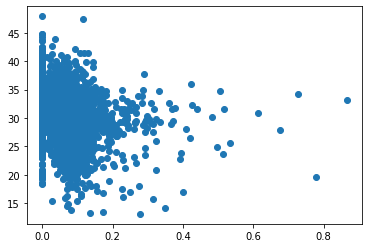

WIC-authorized stores, 2011 vs. Adult obesity rate (county), 2010


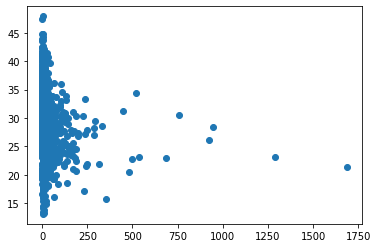

WIC-authorized stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


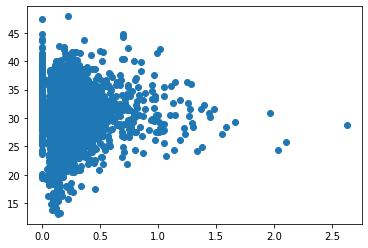

Fast-food restaurants, 2011 vs. Adult obesity rate (county), 2010


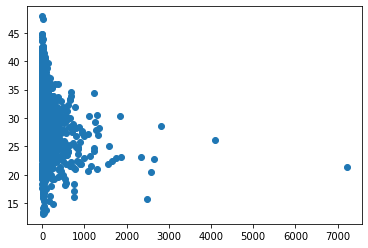

Fast-food restaurants/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


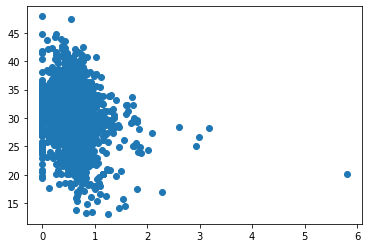

Full-service restaurants, 2011 vs. Adult obesity rate (county), 2010


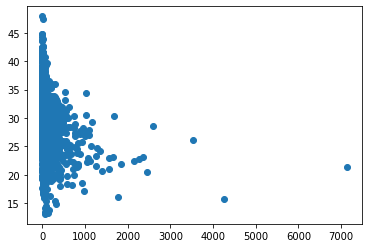

Full-service restaurants/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


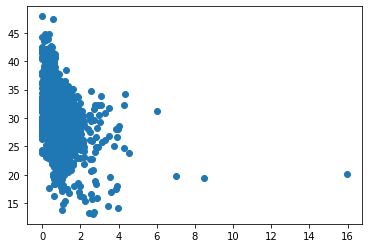

SNAP participants (% eligible pop), 2011 vs. Adult obesity rate (county), 2010


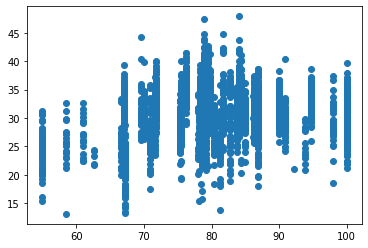

WIC redemptions per capita, 2011 vs. Adult obesity rate (county), 2010


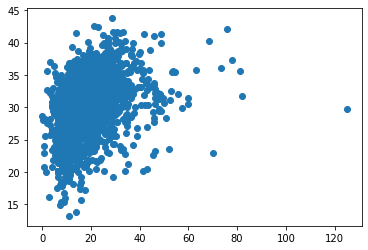

WIC redemptions/WIC-authorized stores, 2011 vs. Adult obesity rate (county), 2010


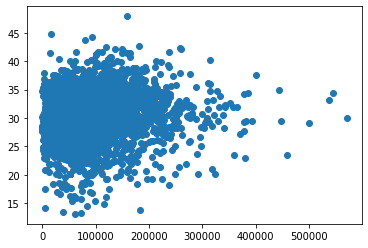

Recreation & fitness facilities, 2011 vs. Adult obesity rate (county), 2010


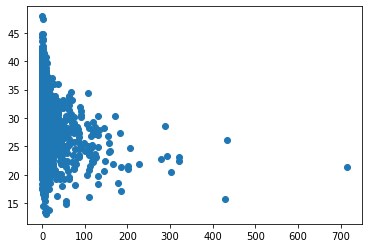

Recreation & fitness facilities/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


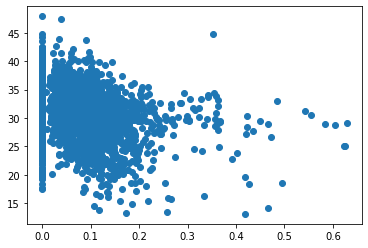

Grocery stores, 2010 vs. Adult obesity rate (county), 2010


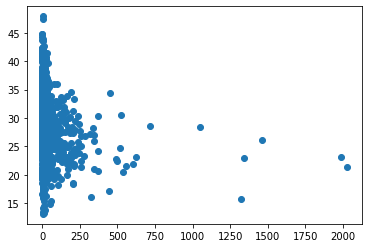

Grocery stores/1,000 pop, 2011 vs. Adult obesity rate (county), 2010


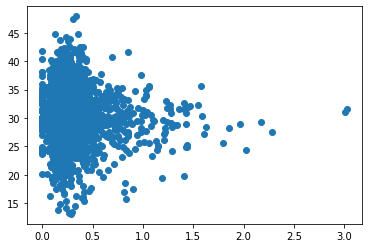

Recreation and fitness facilities, 2010 vs. Adult obesity rate (county), 2010


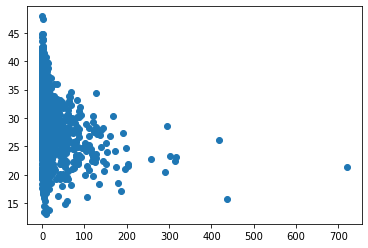

Recreation and fitness facilities/1,000 pop, 2010 vs. Adult obesity rate (county), 2010


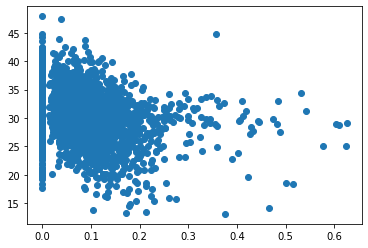

Farms, 2009 vs. Adult obesity rate (county), 2010


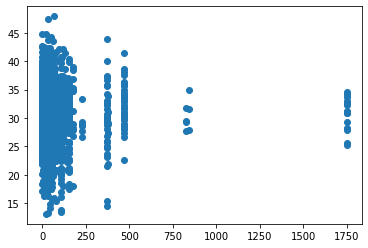

Farms/1,000 pop, 2009 vs. Adult obesity rate (county), 2010


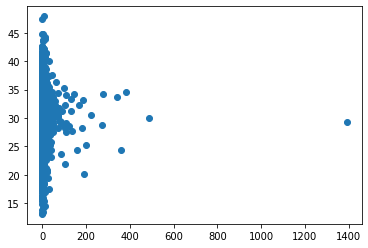

In [ ]:
for var in independent_vars:
  plt.scatter(df_2010[var], df_2010.PCT_OBESE_ADULTS10)
  print(var_definition_dict[var] + ' vs. ' + var_definition_dict['PCT_OBESE_ADULTS10'])
  plt.show()

In [ ]:
df_2010.head(15)

,FIPS,State,County,Region,Division,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
0,1001,AL,Autauga,South,East South Central,0.397647,0.855766,17.582599,0.040314,2.400542,...,15.612932,172391.75000,4.0,0.072465,6.0,0.109949,4.0,0.073299,23.0,0.453148
1,1003,AL,Baldwin,South,East South Central,0.628755,0.735193,9.308425,0.043343,4.384824,...,17.107496,122739.71090,16.0,0.085775,25.0,0.137163,16.0,0.087784,118.0,0.656000
2,1005,AL,Barbour,South,East South Central,0.218524,0.389700,46.691190,0.087409,5.051535,...,21.934052,85699.46875,2.0,0.073123,6.0,0.218524,1.0,0.036421,121.0,4.069005
3,1007,AL,Bibb,South,East South Central,0.279293,0.096007,21.924504,0.030548,1.771765,...,21.482937,81445.39844,0.0,0.000000,6.0,0.261837,1.0,0.043640,31.0,1.436049
4,1009,AL,Blount,South,East South Central,0.497191,0.200621,1.263040,0.031402,8.070200,...,17.110687,123098.56250,3.0,0.052118,6.0,0.104672,3.0,0.052336,43.0,0.736995
5,1011,AL,Bullock,South,East South Central,0.183251,0.183251,69.974345,0.036650,7.119296,...,NaN,260599.37500,0.0,0.000000,2.0,0.183251,0.0,0.000000,96.0,8.739190
6,1013,AL,Butler,South,East South Central,0.281663,0.830668,43.189956,0.033418,0.911825,...,36.561192,190831.14060,0.0,0.000000,3.0,0.143219,0.0,0.000000,70.0,3.506311
7,1015,AL,Calhoun,South,East South Central,0.404817,0.699997,20.390143,0.079277,3.283237,...,22.094103,136979.95310,8.0,0.067920,24.0,0.202409,9.0,0.075903,38.0,0.333097
8,1017,AL,Chambers,South,East South Central,0.166594,0.485167,38.597107,0.020459,1.566564,...,11.316190,64181.65625,0.0,0.000000,8.0,0.233816,2.0,0.058454,11.0,0.320513
9,1019,AL,Cherokee,South,East South Central,0.469429,0.188541,4.640425,0.003848,1.231290,...,24.976461,108206.35160,1.0,0.038472,4.0,0.153911,0.0,0.000000,15.0,0.613547


**Explore Individual columns for preliminary insights**

In [ ]:
#count of null values in dataframe

df_2010.isnull().values.sum()

4324

In [ ]:
#variables missing the most data

df_2010.isnull().sum().sort_values(ascending=False).head()

PC_WIC_REDEMP11     1143
PC_SNAPBEN10         439
REDEMP_WICS11        166
PCT_LOCLFARM09       144
DIRSALES_FARMS09     144
dtype: int64

In [ ]:
#sorts counties based on per capita snap benefits

df_2010['PC_SNAPBEN10'].sort_values(ascending=False)

96      93.868704
2440    78.316297
2444    72.748330
1109    64.712841
3136    62.874134
          ...    
3187          NaN
3188          NaN
3189          NaN
3190          NaN
3191          NaN
Name: PC_SNAPBEN10, Length: 3192, dtype: float64

In [ ]:
#percentage of missing data for each variable

((df_2010.isnull().sum()/len(df_2010))*100).sort_values(ascending=False)

PC_WIC_REDEMP11     35.808271
PC_SNAPBEN10        13.753133
REDEMP_WICS11        5.200501
PCT_LOCLFARM09       4.511278
DIRSALES_FARMS09     4.511278
                      ...    
Division             0.000000
Region               0.000000
State                0.000000
County               0.000000
FIPS                 0.000000
Length: 70, dtype: float64

In [ ]:
#summary statistics for the dataframe

df_2010.describe()

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,...,2049.000000,3026.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3048.000000,3048.000000
mean,1.864595,1.159956,8.711593,0.080436,8.297156,15.853911,23.432630,78.299796,5.500102,4947.366877,...,18.619043,97534.654677,9.371438,0.071577,20.419253,0.264081,9.500000,0.075224,59.060696,5.683247
std,7.589311,2.486802,14.397135,0.943327,13.160933,4.200740,3.372729,19.840982,4.869404,13139.099644,...,9.705259,66727.346738,29.607277,0.073712,82.718552,0.226976,29.529086,0.075891,141.652329,32.852125
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.470599,0.000000,2.667918,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195499,0.270533,0.402406,0.010083,1.597246,13.078249,21.439272,67.058218,2.412137,366.548065,...,12.289787,51931.318360,0.000000,0.000000,3.000000,0.146948,0.000000,0.000000,11.000000,0.195350
50%,0.306942,0.466553,1.873935,0.023009,3.291760,15.553186,23.345129,85.714483,4.430595,947.946202,...,17.049442,85143.460940,2.000000,0.065247,5.000000,0.203776,2.000000,0.067542,30.000000,0.910942
75%,0.624828,1.001025,9.704932,0.046908,8.394322,18.199163,25.130616,94.143167,6.945512,2993.328925,...,22.760386,128070.984375,6.000000,0.107859,12.000000,0.297770,6.000000,0.111442,54.000000,3.549390
max,94.945703,43.014686,85.438778,48.888889,95.744774,43.384714,41.573938,99.163180,34.015595,260308.794100,...,124.903053,570158.312500,714.000000,0.628141,2024.000000,3.021148,719.000000,0.625391,1750.000000,1389.992057


In [ ]:
#summary statistics by region

df_2010.groupby('Region').describe()

PCT_NHNA10                                                     \
               count      mean        std       min       25%       50%   
Region                                                                    
Midwest       1055.0  1.969026   8.721019  0.000000  0.180446  0.303797   
Northeast      217.0  0.309695   0.634038  0.058985  0.125222  0.178063   
South         1423.0  0.995175   3.203360  0.000000  0.195542  0.274977   
West           463.0  5.027500  13.220593  0.000000  0.543853  0.869037   

                               PCT_NHASIAN10            ... DIRSALES_FARMS09  \
                75%        max         count      mean  ...              75%   
Region                                                  ...                    
Midwest    0.597395  94.096864        1055.0  0.761349  ...            54.00   
Northeast  0.269764   7.273397         217.0  2.230405  ...            68.25   
South      0.430969  42.005026        1423.0  0.892268  ...            54.00   
West       2.331276  94.945703         463.0  2.389247  ...            52.50   

                  PCT_LOCLFARM09                                      \
              max          count      mean        std  min       25%   
Region                                                                 
Midwest    1750.0         1018.0  6.499403  21.444658  0.0  0.296449   
Northeast  1750.0          208.0  1.197241   4.575549  0.0  0.044368   
South      1750.0         1375.0  5.363616  42.950909  0.0  0.202954   
West       1750.0          447.0  6.895182  24.880757  0.0  0.190560   

                                            
                50%       75%          max  
Region                                      
Midwest    1.316825  4.708793   341.197114  
Northeast  0.204353  0.904349    60.586319  
South      0.859375  2.859039  1389.992057  
West       0.965030  4.660026   361.445783  

[4 rows x 520 columns]

In [ ]:
#summary statistics by state + DC

df_2010.groupby('State').describe().head()

PCT_NHNA10                                                        \
           count       mean        std       min        25%        50%   
State                                                                    
AK          29.0  32.305072  28.755975  3.504929  11.299760  16.082735   
AL          67.0   0.639322   1.188543  0.079924   0.230231   0.347642   
AR          75.0   0.601408   0.445380  0.130344   0.279070   0.477857   
AZ          15.0  12.984622  20.124245  0.242514   1.439302   2.403233   
CA          58.0   1.727157   2.786848  0.156587   0.436133   0.777215   

                            PCT_NHASIAN10            ... DIRSALES_FARMS09  \
             75%        max         count      mean  ...              75%   
State                                                ...                    
AK     53.510074  94.945703          29.0  4.799088  ...            37.50   
AL      0.540663   7.929014          67.0  0.571305  ...            69.00   
AR      0.686360   2.148576          75.0  0.619434  ...            49.00   
AZ     13.920170  71.814089          15.0  1.115570  ...            65.25   
CA      1.733726  17.872340          58.0  6.494957  ...           106.00   

              PCT_LOCLFARM09                                                \
          max          count      mean        std  min       25%       50%   
State                                                                        
AK       69.0           26.0  7.132800  11.273194  0.0  0.410866  3.910222   
AL      469.0           67.0  1.962872   3.939381  0.0  0.311077  0.688421   
AR     1750.0           73.0  3.943832  17.070179  0.0  0.304936  0.922277   
AZ      106.0           14.0  1.074683   2.270004  0.0  0.060491  0.211525   
CA      469.0           55.0  1.065492   2.545501  0.0  0.057012  0.212022   

                             
            75%         max  
State                        
AK     8.679738   54.347826  
AL     1.851988   28.942659  
AR     2.957880  145.942790  
AZ     0.823532    8.581022  
CA     0.941972   15.752993  

[5 rows x 520 columns]

In [ ]:
#northeast summary statistics

df_2010[df_2010.Region == 'Northeast'].describe()

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,203.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.000000,217.000000,208.000000,208.000000
mean,0.309695,2.230405,4.771192,0.021825,5.764326,15.571649,21.497932,85.304285,3.946909,11635.804191,...,13.037863,86951.481563,31.62212,0.107909,80.603687,0.261473,31.838710,0.109107,65.177885,1.197241
std,0.634038,3.182546,6.352199,0.018407,7.509535,2.572919,2.137405,15.037878,2.693247,18520.559559,...,6.466381,42892.280851,52.46220,0.057306,209.535066,0.128623,52.866418,0.058284,142.657632,4.575549
min,0.058985,0.127989,0.227509,0.000000,0.373648,10.416135,12.402799,10.916766,0.000000,0.000000,...,0.524275,276.809998,0.00000,0.000000,1.000000,0.054517,0.000000,0.000000,0.000000,0.000000
25%,0.125222,0.501117,0.846181,0.014167,1.300858,13.752181,20.192074,80.999211,1.905904,902.275424,...,9.181392,64488.640630,4.00000,0.068993,12.000000,0.180080,4.000000,0.065003,10.000000,0.044368
50%,0.178063,1.029361,2.518913,0.019809,2.689792,15.397375,21.398484,91.342814,3.313413,2748.418002,...,12.517506,83864.937500,10.00000,0.106606,23.000000,0.229363,10.000000,0.108661,32.000000,0.204353
75%,0.269764,2.776761,5.675680,0.025662,6.515116,17.019695,23.100981,95.357703,5.812591,13550.169800,...,16.074193,106837.703100,36.00000,0.141433,59.000000,0.302526,38.000000,0.141671,68.250000,0.904349
max,7.273397,22.787869,42.220476,0.234881,53.527451,24.956922,28.098702,98.118700,11.109619,109930.862600,...,46.220924,246635.156300,429.00000,0.419287,1990.000000,0.834241,437.000000,0.423344,1750.000000,60.586319


In [ ]:
#northeast summary statistics

df_2010[df_2010.Region == 'Midwest'].describe()

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,677.000000,1039.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1018.000000,1018.000000
mean,1.969026,0.761349,2.250679,0.034020,3.783849,17.117075,23.497981,89.884814,6.167839,3455.220056,...,15.999479,73200.267680,6.296682,0.080382,12.181043,0.295648,6.345024,0.084072,59.911591,6.499403
std,8.721019,1.146379,4.622045,0.074550,5.371427,4.162624,2.980610,11.653439,5.505425,9488.482550,...,7.510876,55661.851743,20.486357,0.081118,52.423781,0.249872,20.002002,0.083699,144.431480,21.444658
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.881054,14.558582,2.804357,0.000000,0.000000,...,1.783844,118.519997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180446,0.237125,0.260610,0.006483,1.263361,14.316071,21.884346,88.228696,2.825185,359.748330,...,11.114564,36394.962890,0.000000,0.000000,3.000000,0.153482,0.000000,0.000000,11.000000,0.296449
50%,0.303797,0.368722,0.512913,0.018612,2.030301,16.670613,23.474281,93.734221,4.833559,752.425101,...,15.285563,63750.597660,2.000000,0.073699,5.000000,0.213053,2.000000,0.076249,30.000000,1.316825
75%,0.597395,0.664382,2.024138,0.033905,3.985961,19.856196,24.913761,96.271155,7.285339,1939.564758,...,19.374340,97048.566405,4.000000,0.119034,8.500000,0.348858,4.000000,0.122303,54.000000,4.708793
max,94.096864,11.606047,48.979624,1.104709,56.596375,33.962264,40.126925,99.163180,33.610607,101459.939200,...,75.716797,570158.312500,434.000000,0.554170,1463.000000,2.173913,417.000000,0.541712,1750.000000,341.197114


In [ ]:
#northeast summary statistics

df_2010[df_2010.Region == 'South'].describe()

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
count,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,...,884.000000,1323.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1423.000000,1375.000000,1375.000000
mean,0.995175,0.892268,16.566831,0.038222,9.575464,15.271722,23.512161,70.432985,4.623342,4497.060075,...,21.473714,119229.100998,6.691497,0.056212,14.257906,0.215534,6.881237,0.059150,58.972364,5.363616
std,3.203360,1.488824,17.980260,0.094978,15.172577,3.887447,3.120814,20.262588,3.975486,13145.344252,...,9.235190,67994.434269,19.131817,0.061438,38.682762,0.132156,19.410600,0.061836,143.144101,42.950909
min,0.000000,0.000000,0.000000,0.000000,0.190644,3.727700,9.111539,2.860408,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195542,0.248300,2.183206,0.009126,1.856396,12.796565,21.647049,58.329858,1.837343,309.105826,...,15.105807,74939.421875,0.000000,0.000000,3.000000,0.140161,0.000000,0.000000,11.000000,0.202954
50%,0.274977,0.443004,9.320713,0.022242,3.802475,14.939956,23.570724,72.754195,3.985472,907.821190,...,20.316529,106931.093800,1.000000,0.051332,5.000000,0.186879,1.000000,0.055682,25.000000,0.859375
75%,0.430969,0.888479,26.788093,0.041882,9.510174,17.218507,25.353449,87.652842,6.263344,2879.226979,...,26.602339,153735.210950,5.000000,0.088578,11.000000,0.258277,5.000000,0.092543,54.000000,2.859039
max,42.005026,17.447764,85.438778,2.019058,95.744774,43.384714,35.220372,98.678637,34.015595,260308.794100,...,73.516823,500347.187500,287.000000,0.628141,718.000000,1.342282,294.000000,0.625391,1750.000000,1389.992057


In [ ]:
#northeast summary statistics

df_2010[df_2010.Region == 'West'].describe()

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,...,285.000000,447.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,447.000000,447.000000
mean,5.027500,2.389247,1.137784,0.343412,15.839554,14.897256,23.946047,72.797210,7.401208,6596.633780,...,19.962531,95025.089069,14.185745,0.081711,29.920086,0.342579,14.267819,0.088582,54.548098,6.895182
std,13.220593,5.006625,1.890459,2.441068,16.470628,5.079412,4.826854,21.454600,5.718430,15893.457082,...,13.573779,74547.916643,48.163233,0.085649,115.282056,0.363862,47.731772,0.091238,130.024374,24.880757
min,0.000000,0.000000,0.000000,0.000000,0.093846,3.470599,0.000000,2.667918,0.000000,0.000000,...,2.844600,1249.660034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.543853,0.415683,0.219384,0.038546,3.962720,10.852137,20.636437,59.891031,3.930694,395.282940,...,11.325523,41411.253910,0.000000,0.000000,3.000000,0.146416,0.000000,0.000000,11.000000,0.190560
50%,0.869037,0.716903,0.443406,0.081838,9.813331,14.177768,23.456435,79.476861,5.842479,1474.969341,...,17.118486,74170.234380,2.000000,0.077283,6.000000,0.231235,2.000000,0.079697,30.000000,0.965030
75%,2.331276,1.721804,1.000409,0.165205,21.746749,18.439594,26.689065,89.440041,8.614207,5012.834431,...,24.616104,133233.703100,7.000000,0.121856,15.000000,0.390804,8.000000,0.125248,52.500000,4.660026
max,94.945703,43.014686,14.211649,48.888889,82.819485,32.617502,41.573938,98.424544,31.970266,149646.971900,...,124.903053,459480.718800,714.000000,0.623960,2024.000000,3.021148,719.000000,0.623441,1750.000000,361.445783


In [ ]:
#new dataframe with percentage variables only

df_2010_pct = df_2010[[
'PCT_LACCESS_POP10',
'PCT_LACCESS_SENIORS10',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_HHNV10',
'PCT_FREE_LUNCH10',
'PCT_REDUCED_LUNCH10', 'PCT_OBESE_ADULTS10','PCT_DIABETES_ADULTS10']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8de68135d0>,
      dtype=object)

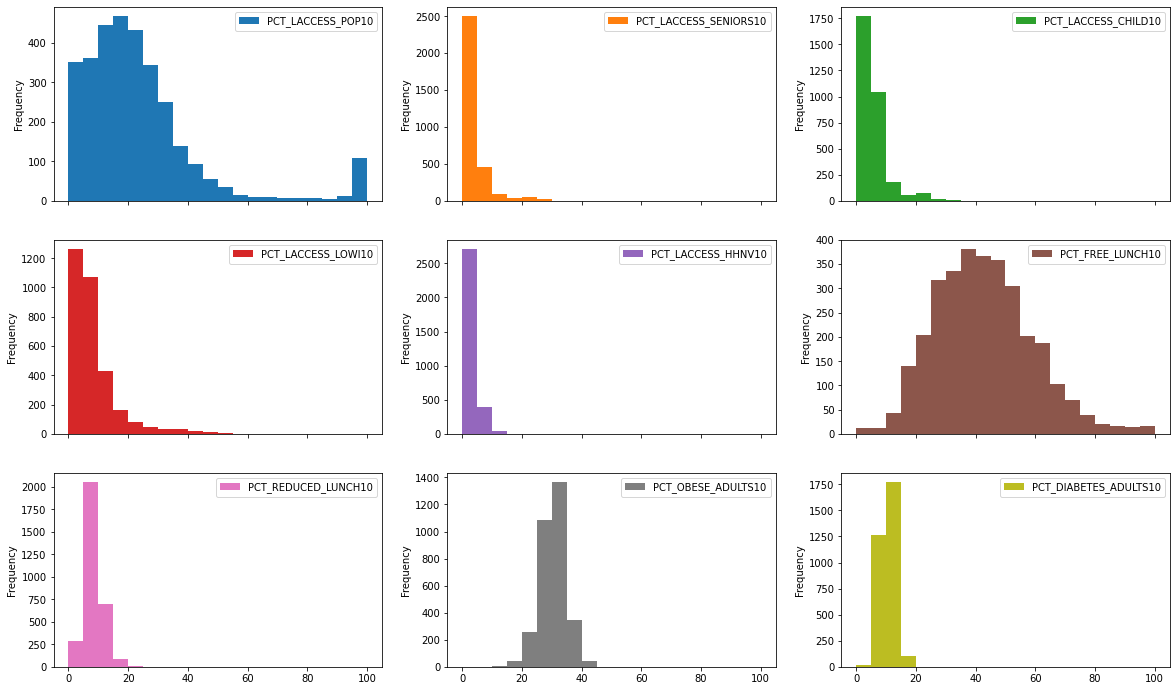

In [ ]:
#histograms of percentage variables

df_2010_pct.plot.hist(subplots=True, layout=(6,3), figsize=(20, 25), bins=20)


**Correlations**

In [ ]:
corrm = df_2010.corr()
corrm

,PCT_NHNA10,PCT_NHASIAN10,PCT_NHBLACK10,PCT_NHPI10,PCT_HISP10,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_LACCESS_CHILD10,LACCESS_CHILD10,...,PC_WIC_REDEMP11,REDEMP_WICS11,RECFAC11,RECFACPTH11,GROC10,GROCPTH10,RECFAC10,RECFACPTH10,DIRSALES_FARMS09,PCT_LOCLFARM09
PCT_NHNA10,1.000000,-0.019037,-0.099273,0.003842,-0.045262,-0.146565,0.289857,-0.301348,0.243262,-0.043392,...,0.294285,-0.052344,-0.054758,-0.083087,-0.035469,0.179488,-0.054939,-0.078295,-0.016151,0.002751
PCT_NHASIAN10,-0.019037,1.000000,0.014941,0.238623,0.146065,-0.309095,-0.004419,-0.267563,-0.020600,0.409163,...,-0.065755,0.172997,0.490023,0.161187,0.421543,-0.046637,0.489418,0.147368,-0.002403,-0.043546
PCT_NHBLACK10,-0.099273,0.014941,1.000000,-0.024356,-0.104351,-0.222438,0.026897,-0.614044,-0.097504,0.083938,...,0.303546,0.270955,0.060184,-0.104901,0.084311,-0.116324,0.061236,-0.109482,0.021728,-0.038711
PCT_NHPI10,0.003842,0.238623,-0.024356,1.000000,0.005238,0.017412,-0.104448,-0.091737,-0.008155,0.030424,...,0.034938,0.107461,0.018932,-0.010751,0.017209,-0.016968,0.018785,-0.012195,-0.005692,0.174322
PCT_HISP10,-0.045262,0.146065,-0.104351,0.005238,1.000000,-0.210306,0.309169,-0.585661,0.119801,0.200077,...,0.239848,0.364139,0.153732,-0.050725,0.161859,-0.061006,0.152756,-0.054416,-0.006857,0.038164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GROCPTH10,0.179488,-0.046637,-0.116324,-0.016968,-0.061006,0.319951,-0.091754,0.060784,0.312016,-0.133402,...,0.205655,-0.380400,-0.071968,-0.070137,0.013553,1.000000,-0.073405,-0.053802,-0.010377,0.136822
RECFAC10,-0.054939,0.489418,0.061236,0.018785,0.152756,-0.210971,0.018874,-0.196147,-0.020883,0.791183,...,-0.048804,0.178172,0.998242,0.189409,0.818719,-0.073405,1.000000,0.184230,0.012674,-0.050916
RECFACPTH10,-0.078295,0.147368,-0.109482,-0.012195,-0.054416,-0.049225,-0.059838,0.125346,-0.067750,0.120716,...,-0.228270,0.002403,0.177151,0.898411,0.076633,-0.053802,0.184230,1.000000,-0.020741,-0.081806
DIRSALES_FARMS09,-0.016151,-0.002403,0.021728,-0.005692,-0.006857,-0.011803,-0.009467,-0.004263,0.001044,0.023274,...,-0.007825,0.000173,0.014190,-0.009619,0.008974,-0.010377,0.012674,-0.020741,1.000000,0.459310


In [ ]:
#Positive Correlation With Obesity Rate, Most Positive to Least
pos_cor = corrm['PCT_OBESE_ADULTS10'] > 0
corrm ['PCT_OBESE_ADULTS10'][pos_cor].sort_values(ascending = False).to_frame()


,PCT_OBESE_ADULTS10
PCT_OBESE_ADULTS10,1.000000
PCT_DIABETES_ADULTS10,0.725051
PCT_FREE_LUNCH10,0.491879
PC_SNAPBEN10,0.485822
CHILDPOVRATE10,0.472667
POVRATE10,0.461555
PCT_NHBLACK10,0.410844
SNAPSPTH10,0.352420
PERCHLDPOV10,0.346610
PC_WIC_REDEMP11,0.343799


In [ ]:
#Negative Correlation With Obesity Rate, Most Negative to Least
neg_cor = corrm['PCT_OBESE_ADULTS10'] < 0
corrm ['PCT_OBESE_ADULTS10'][neg_cor].sort_values(ascending = False).to_frame()

,PCT_OBESE_ADULTS10
PCT_LOCLFARM09,-0.010359
PCT_65OLDER10,-0.010955
GROCPTH10,-0.058970
GROCPTH11,-0.064099
PCT_NHPI10,-0.064121
PCT_LACCESS_CHILD10,-0.074158
SNAP_FACEWAIVER10,-0.079843
PCT_LACCESS_SENIORS10,-0.102925
PCT_LACCESS_POP10,-0.106967
LACCESS_HHNV10,-0.124948


**Heatmap**

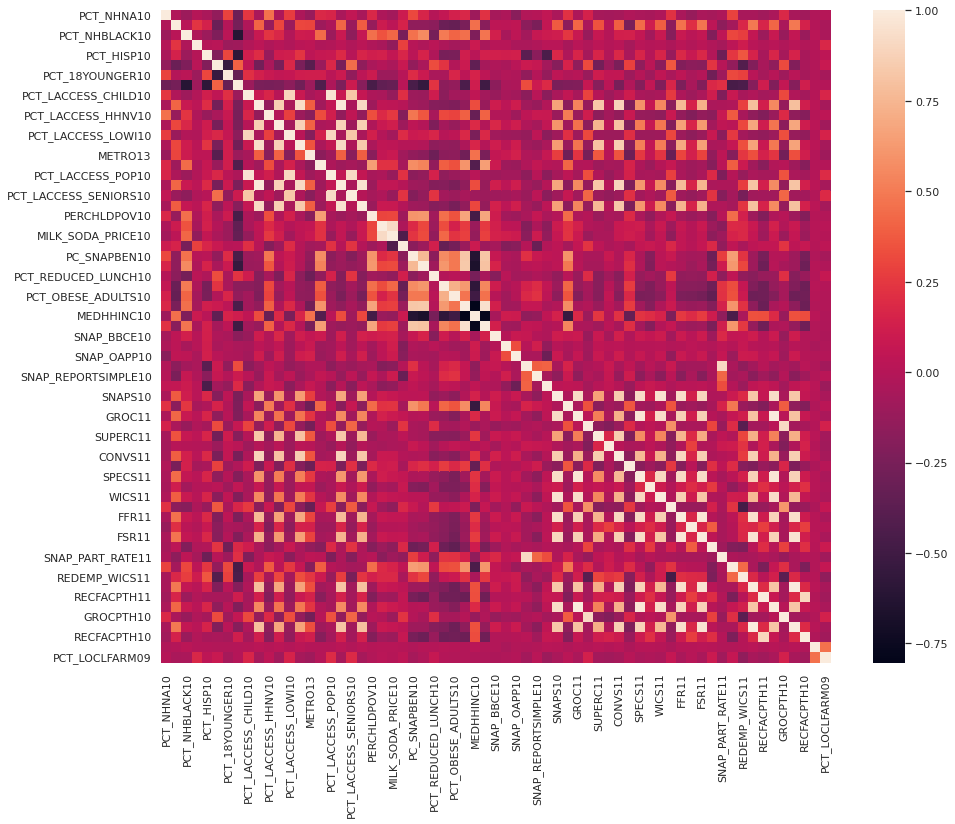

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(df_2010.corr())

Models

OLS Regression Results   

In [ ]:
model_one = sm.ols(formula='PCT_OBESE_ADULTS10 ~ Region + PCT_DIABETES_ADULTS10 + PCT_NHNA10 + PCT_NHASIAN10 + PCT_NHBLACK10 + PCT_NHPI10 + PCT_HISP10 + PCT_65OLDER10 + PCT_18YOUNGER10 + PCT_NHWHITE10 +PCT_LACCESS_CHILD10 + LACCESS_CHILD10 + PCT_LACCESS_HHNV10 + LACCESS_HHNV10 + PCT_LACCESS_LOWI10 + LACCESS_LOWI10 + METRO13 +PERPOV10 + PCT_LACCESS_POP10 + LACCESS_POP10 + PCT_LACCESS_SENIORS10 + LACCESS_SENIORS10 + PERCHLDPOV10 + MILK_PRICE10 + MILK_SODA_PRICE10 + SODA_PRICE10 + PC_SNAPBEN10 + PCT_FREE_LUNCH10 + PCT_REDUCED_LUNCH10 + CHILDPOVRATE10 + MEDHHINC10 + POVRATE10 + SNAP_BBCE10 + SNAP_FACEWAIVER10 + SNAP_OAPP10 + SNAP_PART_RATE10 + SNAP_REPORTSIMPLE10 + SNAP_VEHEXCL10 + SNAPS10 + SNAPSPTH10 + GROC11 + GROCPTH11 + SUPERC11 + SUPERCPTH11 + CONVS11 + CONVSPTH11 + SPECS11 + SPECSPTH11 + WICS11 + WICSPTH11 + FFR11 + FFRPTH11 + FSR11 + FSRPTH11 + SNAP_PART_RATE11 + PC_WIC_REDEMP11 + REDEMP_WICS11 + RECFAC11 + RECFACPTH11 + GROC10 + GROCPTH10 + RECFAC10 + RECFACPTH10 + DIRSALES_FARMS09 + PCT_LOCLFARM09', data=df_2010)
fitted_one = model_one.fit()
print(fitted_one.summary())
#Based on the results, we can keep the following variables (assuming 95% confidence interval): PCT_DIABETES_ADULTS_10, PCT_65_OLDER10, PCT_18_YOUNGER10, PCT_LACCESS_HHNV10, MILK_PRICE10, MILK_SODA_PRICE10, SODA_PRICE10, PCT_FREE_LUNCH10, CHILDPOVRATE10, MEDHHINC10, SNAP_PART_RATE10,SUPERC11,SUPERCPTH11, FFR11, FFRPTH11, FSR11, SNAP_PART_RATE11

                            OLS Regression Results                            
Dep. Variable:     PCT_OBESE_ADULTS10   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     68.33
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:23:49   Log-Likelihood:                -3757.8
No. Observations:                1727   AIC:                             7652.
Df Residuals:                    1659   BIC:                             8023.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                94.76

In [ ]:
model_two = sm.ols(formula='PCT_OBESE_ADULTS10 ~ Region + PCT_DIABETES_ADULTS10 + PCT_65OLDER10 + PCT_18YOUNGER10 + PCT_LACCESS_HHNV10 + MILK_PRICE10 + MILK_SODA_PRICE10 + SODA_PRICE10 + PC_SNAPBEN10 + PCT_FREE_LUNCH10 + CHILDPOVRATE10 + MEDHHINC10 + POVRATE10 + SNAP_BBCE10 + SNAP_FACEWAIVER10 + SNAP_OAPP10 + SNAP_PART_RATE10 + SNAP_REPORTSIMPLE10 + SNAP_VEHEXCL10 + SNAPS10 + SNAPSPTH10 + GROC11 + GROCPTH11 + SUPERC11 + SUPERCPTH11 + CONVS11 + CONVSPTH11 + SPECS11 + SPECSPTH11 + WICS11 + WICSPTH11 + FFR11 + FFRPTH11 + FSR11 + FSRPTH11 + SNAP_PART_RATE11 + PC_WIC_REDEMP11 + REDEMP_WICS11 + RECFAC11 + RECFACPTH11 + GROC10 + GROCPTH10 + RECFAC10 + RECFACPTH10 + DIRSALES_FARMS09 + PCT_LOCLFARM09', data=df_2010)
fitted_two = model_two.fit()
print(fitted_two.summary())

                            OLS Regression Results                            
Dep. Variable:     PCT_OBESE_ADULTS10   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     90.97
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:23:49   Log-Likelihood:                -3794.8
No. Observations:                1727   AIC:                             7688.
Df Residuals:                    1678   BIC:                             7955.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                82.81

In [ ]:
model_actionable = sm.ols(formula='PCT_OBESE_ADULTS10 ~ PCT_LACCESS_CHILD10+LACCESS_CHILD10+PCT_LACCESS_HHNV10+LACCESS_HHNV10+PCT_LACCESS_LOWI10+LACCESS_LOWI10+METRO13+PERPOV10+PCT_LACCESS_POP10+LACCESS_POP10+PCT_LACCESS_SENIORS10+LACCESS_SENIORS10+PERCHLDPOV10+MILK_PRICE10+MILK_SODA_PRICE10+SODA_PRICE10+PC_SNAPBEN10+PCT_FREE_LUNCH10+PCT_REDUCED_LUNCH10+CHILDPOVRATE10+MEDHHINC10+POVRATE10+SNAP_BBCE10+SNAP_FACEWAIVER10+SNAP_OAPP10+SNAP_PART_RATE10+SNAP_REPORTSIMPLE10+SNAP_VEHEXCL10+GROC11+GROCPTH11+SUPERC11+SUPERCPTH11+CONVS11+CONVSPTH11+SPECS11+SPECSPTH11+WICS11+WICSPTH11+FFR11+FFRPTH11+FSR11+FSRPTH11+SNAP_PART_RATE11+PC_WIC_REDEMP11+REDEMP_WICS11+RECFAC11+RECFACPTH11+GROC10+GROCPTH10+RECFAC10+RECFACPTH10', data=df_2010)
fitted_actionable = model_actionable.fit()
print(fitted_actionable.summary())

                            OLS Regression Results                            
Dep. Variable:     PCT_OBESE_ADULTS10   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     46.36
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          2.16e-283
Time:                        23:23:49   Log-Likelihood:                -4333.2
No. Observations:                1796   AIC:                             8770.
Df Residuals:                    1744   BIC:                             9056.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               209.79

In [ ]:
p = pd.DataFrame(fitted_actionable.pvalues)
p = p[p[0] <= .05]

sig_vars = ''
for i in p.index:
  sig_vars = sig_vars + '+' + str(i)

sig_vars

'+Intercept+LACCESS_HHNV10+LACCESS_LOWI10+METRO13+MILK_PRICE10+MILK_SODA_PRICE10+SODA_PRICE10+PC_SNAPBEN10+PCT_FREE_LUNCH10+MEDHHINC10+POVRATE10+SNAP_BBCE10+SNAP_FACEWAIVER10+SNAP_PART_RATE10+SNAP_REPORTSIMPLE10+GROC11+SUPERC11+SUPERCPTH11+CONVSPTH11+FFR11+FFRPTH11+FSR11+FSRPTH11+SNAP_PART_RATE11+PC_WIC_REDEMP11+RECFAC11'

In [ ]:
model_actionable_sub = sm.ols(formula='PCT_OBESE_ADULTS10 ~ LACCESS_HHNV10+LACCESS_LOWI10+METRO13+MILK_PRICE10+MILK_SODA_PRICE10+SODA_PRICE10+PC_SNAPBEN10+PCT_FREE_LUNCH10+MEDHHINC10+POVRATE10+SNAP_BBCE10+SNAP_FACEWAIVER10+SNAP_PART_RATE10+SNAP_REPORTSIMPLE10+GROC11+SUPERC11+SUPERCPTH11+CONVSPTH11+FFR11+FFRPTH11+FSR11+FSRPTH11+SNAP_PART_RATE11+PC_WIC_REDEMP11+RECFAC11', data=df_2010)
fitted_actionable_sub = model_actionable_sub.fit()
print(fitted_actionable_sub.summary())

                            OLS Regression Results                            
Dep. Variable:     PCT_OBESE_ADULTS10   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     88.08
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.53e-288
Time:                        23:23:49   Log-Likelihood:                -4376.8
No. Observations:                1796   AIC:                             8806.
Df Residuals:                    1770   BIC:                             8948.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             199.7562    

In [ ]:
p2 = pd.DataFrame(fitted_actionable_sub.pvalues)
p2 = p2[p2[0] <= .05]

sig_vars2 = ''
for i in p2.index:
  sig_vars2 = sig_vars2 + '+' + str(i)

sig_vars2

'+Intercept+MILK_PRICE10+MILK_SODA_PRICE10+SODA_PRICE10+PC_SNAPBEN10+PCT_FREE_LUNCH10+MEDHHINC10+POVRATE10+SNAP_BBCE10+SNAP_FACEWAIVER10+SNAP_PART_RATE10+SNAP_REPORTSIMPLE10+GROC11+SUPERC11+CONVSPTH11+FFR11+FFRPTH11+FSR11+FSRPTH11+SNAP_PART_RATE11+PC_WIC_REDEMP11+RECFAC11'

In [ ]:
model_actionable_final = sm.ols(formula='PCT_OBESE_ADULTS10 ~ MILK_PRICE10+MILK_SODA_PRICE10+SODA_PRICE10+PC_SNAPBEN10+PCT_FREE_LUNCH10+MEDHHINC10+POVRATE10+SNAP_BBCE10+SNAP_FACEWAIVER10+SNAP_PART_RATE10+SNAP_REPORTSIMPLE10+GROC11+SUPERC11+CONVSPTH11+FFR11+FFRPTH11+FSR11+FSRPTH11+SNAP_PART_RATE11+PC_WIC_REDEMP11+RECFAC11', data=df_2010)
fitted_actionable_final = model_actionable_final.fit()
print(fitted_actionable_final.summary())

                            OLS Regression Results                            
Dep. Variable:     PCT_OBESE_ADULTS10   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     104.5
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.94e-291
Time:                        23:23:49   Log-Likelihood:                -4379.4
No. Observations:                1796   AIC:                             8803.
Df Residuals:                    1774   BIC:                             8924.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             199.5521    

In [ ]:
fitted_actionable_final.params

Intercept              199.552123
MILK_PRICE10           156.172114
MILK_SODA_PRICE10     -162.976919
SODA_PRICE10          -171.624303
PC_SNAPBEN10             0.098761
PCT_FREE_LUNCH10         0.039841
MEDHHINC10              -0.000043
POVRATE10               -0.103343
SNAP_BBCE10             -0.488105
SNAP_FACEWAIVER10       -1.900648
SNAP_PART_RATE10         0.137393
SNAP_REPORTSIMPLE10      1.750346
GROC11                  -0.008570
SUPERC11                -0.107642
CONVSPTH11               2.707673
FFR11                    0.009960
FFRPTH11                -1.357746
FSR11                   -0.005003
FSRPTH11                -2.323979
SNAP_PART_RATE11        -0.155457
PC_WIC_REDEMP11          0.040200
RECFAC11                -0.029703
dtype: float64